# <center>Machine Learning Lab: Exercise Sheet 1</center>
<center> <b>Submitted By: Mohit Bansal</b></center>
<center> <b>Student ID: 279314</b></center>

## Exercise 1: Pandas (10 Points) <br>

### Dataset Exploration: 

Download Gasprices.csv. This dataset contains information about the sales of gas stations across a city along with other attributes. You will analyze this dataset using pandas library and plot some interesting information using matplotlib library.


+ **Load the data using pandas**

In [178]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Nov  13 12:45:57 2018

@author: mundanemohit
"""

# Import Libraries
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

path = '/Users/mundanemohit/Google Drive/My Work/MSc. Data Analytics/WiSe 18/3113 Machine Learning Lab/Excercises/Ex2'
os.chdir(path)
filename = 'GasPrices.csv'
gasDF = pd.read_csv(filename)

# Delete first column since it is redundant
gasDF = gasDF.drop(gasDF.columns[0], axis=1)

gasDF.head()

,ID,Name,Price,Pumps,Interior,Restaurant,CarWash,Highway,Intersection,Stoplight,IntersectionStoplight,Gasolines,Competitors,Zipcode,Address,Income,Brand
0,1,Shell,1.79,4,Y,N,N,N,Y,N,Intersection,3,N,78705,3201 N Lamar Blvd,12786,Shell
1,2,Valero,1.83,4,Y,N,N,N,Y,N,Intersection,3,N,78705,3515 N Lamar Blvd,12786,Other
2,3,7-Eleven,1.88,4,Y,N,N,N,Y,Y,Both,3,Y,78751,5101 N Lamar Blvd,41279,Other
3,4,Texaco,1.88,4,Y,N,Y,N,Y,Y,Both,4,Y,78751,5301 N Lamar Blvd,41279,Chevron-Texaco
4,5,Shell,1.84,6,Y,N,N,N,Y,Y,Both,3,N,78751,5630 N Lamar Blvd,41279,Shell


In [179]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
 border: 1px black solid !important;
 color: black !important;
 index: 0;
}
### FORMATTING ###

+ **Summarize each NUMERIC field in the data, i.e. mean, average etc.**

In [180]:
gasDF.describe()

,ID,Price,Pumps,Gasolines,Zipcode,Income
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,51.000000,1.864257,6.950495,3.465347,78730.782178,56727.217822
std,29.300171,0.081515,3.925242,0.557931,22.054298,25868.359804
min,1.000000,1.730000,2.000000,1.000000,78701.000000,12786.000000
25%,26.000000,1.790000,4.000000,3.000000,78704.000000,37690.000000
50%,51.000000,1.850000,6.000000,3.000000,78731.000000,52306.000000
75%,76.000000,1.920000,8.000000,4.000000,78752.000000,70095.000000
max,101.000000,2.090000,24.000000,4.000000,78759.000000,128556.000000


Group data by the field ’Name’.

+ **Find the average price,average income and average number of pumps for
each group.**

In [181]:
gasDF.groupby('Name')['Price', 'Income', 'Pumps'].mean()

,Price,Income,Pumps
Name,,,
7-Eleven,1.887778,53432.333333,4.666667
Around the Corner Store,1.940000,63750.000000,2.000000
Chevron,1.871818,61754.636364,8.727273
Citgo,1.835000,49387.000000,4.000000
Conoco,1.890000,43545.500000,4.000000
Costco,1.730000,70095.000000,12.000000
Double R Grocery,1.790000,37690.000000,4.000000
East 1st Grocery,1.770000,37690.000000,4.000000
Exxon,1.855000,52344.333333,11.500000


+ **Use a boxplot that visualizes the statistical information about (price, pumps, gasoline)**

[]

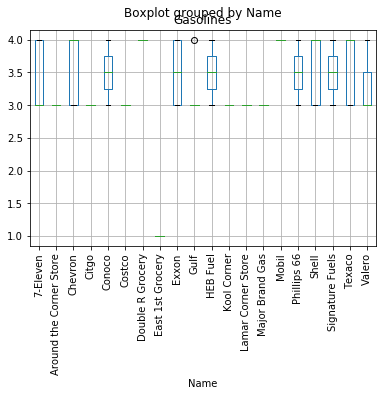

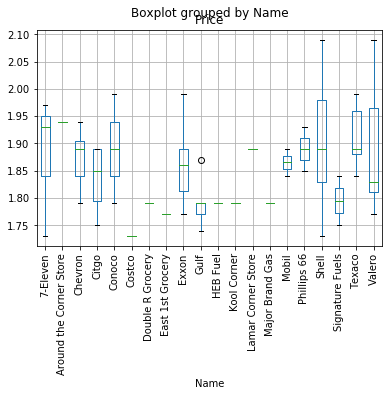

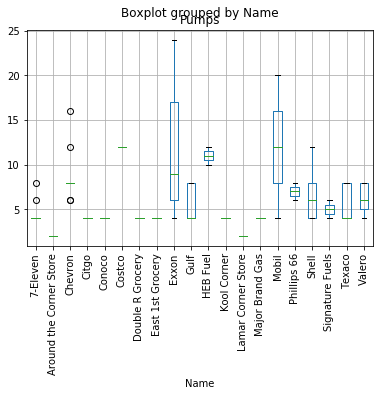

In [182]:
box = gasDF.boxplot(by = 'Name', column=['Gasolines'])
box.set_xticklabels(labels = box.get_xticklabels(), rotation = 90)
box = gasDF.boxplot(by = 'Name', column=['Price'])
box.set_xticklabels(labels = box.get_xticklabels(), rotation = 90)
box = gasDF.boxplot(by = 'Name', column=['Pumps'])
box.set_xticklabels(labels = box.get_xticklabels(), rotation = 90)
box.plot()

+ **Use the Price and Income features in order to plot a prediction line similar to the first exercise. **

RMSE:  558567505.29822


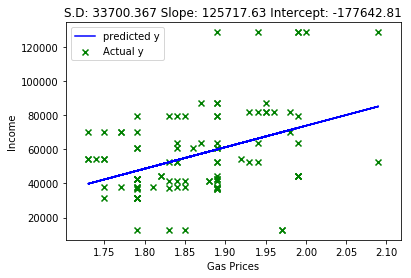

In [183]:
# Reusing linear regression functions from the previous excercises
def learn_simple_linreg(A):
    x = A[:,0]
    y = A[:,1]
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calculating beta values
    numer = np.multiply((x - x_mean), (y - y_mean))
    denom = (x-x_mean)**2
    beta_1 = np.sum(numer)/np.sum(denom)
    beta_0 = y_mean - beta_1 * x_mean

    return beta_0, beta_1

def predict_simple_linreg(A, beta_0, beta_1):
    return beta_0 + A[:,0] * beta_1

# Function for plotting y & y_hat
def pred_plot(A, beta_0, beta_1):
    y_hat = predict_simple_linreg(A, beta_0, beta_1)
    print("RMSE: ", round(mean_squared_error(A[:,1], y_hat), 5))
    plt.scatter(A[:,0],A[:,1], color = 'green', marker = 'x', label = 'Actual y')
    plt.plot(A[:,0], y_hat, color = 'blue', label = 'predicted y')
    plt.xlabel('Gas Prices')
    plt.ylabel('Income')
    plt.title("S.D: {} Slope: {} Intercept: {}".format(round(np.std(A),3), round(beta_1,3), round(beta_0,2)))
    plt.legend()
    plt.show()
    
# MODEL 1: Income vs, Price
linDF = gasDF[['Price', 'Income']].values
beta_0, beta_1 = learn_simple_linreg(linDF)
pred_plot(linDF, beta_0, beta_1)

+ **Normalize the Income (implement this yourself) and plot the line again. Comment on the different of the two plots.**

RMSE:  0.04168


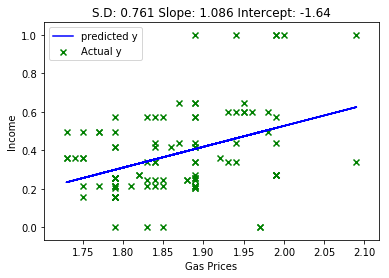

In [184]:
# Normalizing income
def normalize(l):
    max_value = max(l)
    min_value = min(l)
    for i in range(0, len(l)):
        l[i] = (l[i] - min_value) / (max_value - min_value)
    return l

linDF[:,1] = normalize(linDF[:,1])

# MODEL 2: Normalized Income vs, Price
beta_0, beta_1 = learn_simple_linreg(linDF)
pred_plot(linDF, beta_0, beta_1)

Therefore, we see that after normalization, the y-values range between 0 & 1. While this does not necessarily impact the regression line, it does have a significant effect on the coefficients and the RMSE which are now more comprehensible. 

Normalization scales down the range of a variable between 0 and 1. This is useful in cases where we have outliers and the data range is skewed. 

## Exercise 2: Linear Regression via Normal Equations (10 Points) <br>


 
#### In this exercise you will implement (multiple) linear regression using Normal Equations.

+ **Reuse dataset from Excercise 1. Load it as $X_{data}$, [Hint:] from loaded data you need to separate $Y_{data}$ i.e. Income, which is your target.**

In [185]:
X_Data = gasDF.drop('Income', axis=1)
Y_Data = gasDF[['Income']]
X_Data.head()

,ID,Name,Price,Pumps,Interior,Restaurant,CarWash,Highway,Intersection,Stoplight,IntersectionStoplight,Gasolines,Competitors,Zipcode,Address,Brand
0,1,Shell,1.79,4,Y,N,N,N,Y,N,Intersection,3,N,78705,3201 N Lamar Blvd,Shell
1,2,Valero,1.83,4,Y,N,N,N,Y,N,Intersection,3,N,78705,3515 N Lamar Blvd,Other
2,3,7-Eleven,1.88,4,Y,N,N,N,Y,Y,Both,3,Y,78751,5101 N Lamar Blvd,Other
3,4,Texaco,1.88,4,Y,N,Y,N,Y,Y,Both,4,Y,78751,5301 N Lamar Blvd,Chevron-Texaco
4,5,Shell,1.84,6,Y,N,N,N,Y,Y,Both,3,N,78751,5630 N Lamar Blvd,Shell


+ **Choose those columns, which can help you in prediction i.e. contain some useful information. You can drop irrelevant columns. Give reason for choosing or dropping any column.**

In [186]:
X_Data = X_Data.drop(['ID', 'Address', 'Name', 'Interior', 'Restaurant', 'CarWash',
                      'Highway', 'Intersection', 'Stoplight', 'IntersectionStoplight',
                      'Competitors', 'Zipcode', 'Brand'], axis=1)
X_Data.head()

,Price,Pumps,Gasolines
0,1.79,4,3
1,1.83,4,3
2,1.88,4,3
3,1.88,4,4
4,1.84,6,3


+ We drop **ID** column since it is just a row index
+ **Address** is a text column and isn't really useful for prediction
+ Columns **Name, IntersectionStoplight & Brand** are categorical variables. These have to be transformed in an appropriate manner before they can be used for regression
+ Columns **Interior, Restaurant, CarWash, Highway, Intersection, Spotlight & Competitors** are binary and again need to be transformed.

We drop the categorical and binary variables since their transformation would add several more steps and dimensions to the overall process. However, we acknowledge that these variables could definitely be very useful for an accurate prediction.

+ Split your dataset $X_{data}$, $Y_{data}$ into $X_{train}$, $Y_{train}$ and $X_{test}$, $Y_{test}$ i.e. you can randomly assign 80% of the data to a $X_{train}$, $Y_{train}$ set and remaining 20% to a $X_{test}$, $Y_{test}$ set.

In [187]:
# Add bias column 
X_Data = np.matrix(np.column_stack(([1] * len(X_Data), X_Data)))

mask = np.random.rand(len(X_Data)) < 0.8

X_Train, Y_Train = X_Data[mask], Y_Data[mask]
X_Test, Y_Test = X_Data[~mask], Y_Data[~mask]

print("Training Set: ", len(X_Train))
print("Testing Set: ", len(X_Test))

Training Set:  79
Testing Set:  22


+ Implement **learn-linreg-NormEq** algorithm and learn a parameter vector β using $X_{train}$ set. You have to learn a model to predict sales price of houses i.e. , $Y_{test}$.

** Normal Equation is as follows:**


* $X^TXβ$ = $X^Ty$

* A = $X^TX$
* b = $X^Ty$
* β = $Solve-SLE(A, b)$
* return β

In [188]:
def learn_linreg(X, y, method = "Gaussian"):
    A = np.matrix(X.T) * np.matrix(X)
    b = np.matrix(X.T) * np.matrix(y)
    beta = solve_sle(A, b, method)
    return beta

+ Line 6, in **learn-linreg-NormEq** uses **SOLVE-SLE**. You have to replace **SOLVE-SLE** with following options. For each option you will learn a separate set of parameters. (Implement this yourself)

**(a) Gaussian elimination**

In [189]:
def gaussian(A, b):
    n = len(A)
    A = np.column_stack((A,b))

    for i in range(0, n):
        # Search for maximum in this column
        maxEl = abs(A[i,i])
        maxRow = i
        for k in range(i+1, n):
            if abs(A[k,i]) > maxEl:
                maxEl = abs(A[k,i])
                maxRow = k

        # Swap maximum row with current row (column by column)
        for k in range(i, n+1):
            tmp = A[maxRow,k]
            A[maxRow,k] = A[i,k]
            A[i,k] = tmp

        # Make all rows below this one 0 in current column
        for k in range(i+1, n):
            c = -A[k,i]/A[i,i]
            for j in range(i, n+1):
                if i == j:
                    A[k,j] = 0
                else:
                    A[k,j] += c * A[i,j]

    # Solve equation Ax=b for an upper triangular matrix A
    x = [0 for i in range(n)]
    for i in range(n-1, -1, -1):
        x[i] = A[i,n]/A[i,i]
        for k in range(i-1, -1, -1):
            A[k,n] -= A[k,i] * x[i]
    return x

** b) Cholesky Decomposition **

In [190]:
def cholesky(A, b):
    """
       Performs a Cholesky decomposition of on symmetric, pos-def A.
       Returns lower-triangular L (full sized, zeroed above diag)
    """
    n = A.shape[0]
    L = np.zeros_like(A)

    # Perform the Cholesky decomposition
    n = A.shape[0]
    L = np.empty_like(A)

    # Perform the Cholesky decomposition
    for row in range(n):
        for col in range(row+1):
            tmp_sum = 0.0
            for j in range(col):
                tmp_sum += L[row,j] * L[col,j]
            
            if (row == col): 
                # diag elts.
                L[row,col] = np.sqrt(A[row,row] - tmp_sum)
            else:
                # off diag elts.
                L[row,col] = (1.0 / L[col,col] * (A[row,col] - tmp_sum))
        L[row, row+1:] = 0.0
    
    # Find betas
    beta = np.matmul(L.T, L)
    beta = np.linalg.inv(beta)
    beta = np.matmul(beta, b).T
    beta = np.array(beta)[0]
    return beta

** (c) QR Decomposition **

In [191]:
def QRD(A, b):
    beta = np.linalg.inv(A)
    beta = np.matmul(beta, b)
    beta = np.array(beta).T[0]
    return beta

In [192]:
def solve_sle(A, b, method = "Gaussian"):
    if method == "Gaussian":
        print("\nGaussian Method")
        beta = gaussian(A,b)
        return beta
    if method == "Cholesky":
        print("\nCholesky Method")
        beta = cholesky(A,b)
        return beta
    if method == "QR":
        print("\nQR Method")
        beta = QRD(A, b)
        return beta

+ Perform prediction $\hat{y}$ on test dataset i.e. $X_{test}$ using the set of parameters learned in steps 5 and 6 (Hint. you will have three different prediction models based on the replacement function from step 6).

In [193]:
def predict(X, Y, beta):
    yhat = np.matmul(X, beta).round(4).T
    RMSE = round(math.sqrt(mean_squared_error(Y, yhat)), 4)
    print("Test MSE: ", MSE)

+ Final step is to find how close these three models are to the original values.
    + plot residual  = |ytest − y¯| vs true value of ytest for each model.
    + Find the average residual  = |ytest − y¯| of each model.
    + Find the root-mean-square error (RMSE) of each model.

In [194]:
# Find betas by Gaussian method
beta = learn_linreg(X_Train, Y_Train, method = "Gaussian")
print("BETA: ", beta)
predict(X_Test, Y_Test, beta)    

# Find betas by Cholesky Decomposition
beta = learn_linreg(X_Train, Y_Train, method = "Cholesky")
print("BETA: ", beta)
predict(X_Test, Y_Test, beta.T)    

# Find betas by Cholesky Decomposition
beta = learn_linreg(X_Train, Y_Train, method = "QR")
print("BETA: ", beta)
predict(X_Test, Y_Test, beta.T)    


Gaussian Method
BETA:  [-157454.61850267043, 112486.17009394578, 517.3586595792559, -217.55273544176887]
Test MSE:  310213063.9074

Cholesky Method
BETA:  [-4.70174901e+06  1.33916279e+08  2.53672092e+07  6.85382835e+06]
Test MSE:  310213063.9074

QR Method
BETA:  [-157454.61850269  112486.17009396     517.35865958    -217.55273544]
Test MSE:  310213063.9074
